In [1]:
import sys
path = r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\venv\Utilities"
sys.path.append(path)

In [2]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THIS

In [3]:
from Utilities.OneDReg import LR
from Utilities import plot_settings

c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities\OneDReg.py:78: SyntaxWarning: invalid escape sequence '\c'
  plt.text(0.05, 0.95, f'$\chi^2_r$ = {self.compute_reduced_chi2():.2f}',


In [13]:
fitter = LR(z_sample, mu_sample, dmu, 3) # YOU CANNOT CHANGE THIS

In [14]:
fitter.linear_fit() # YOU CANNOT CHANGE THIS

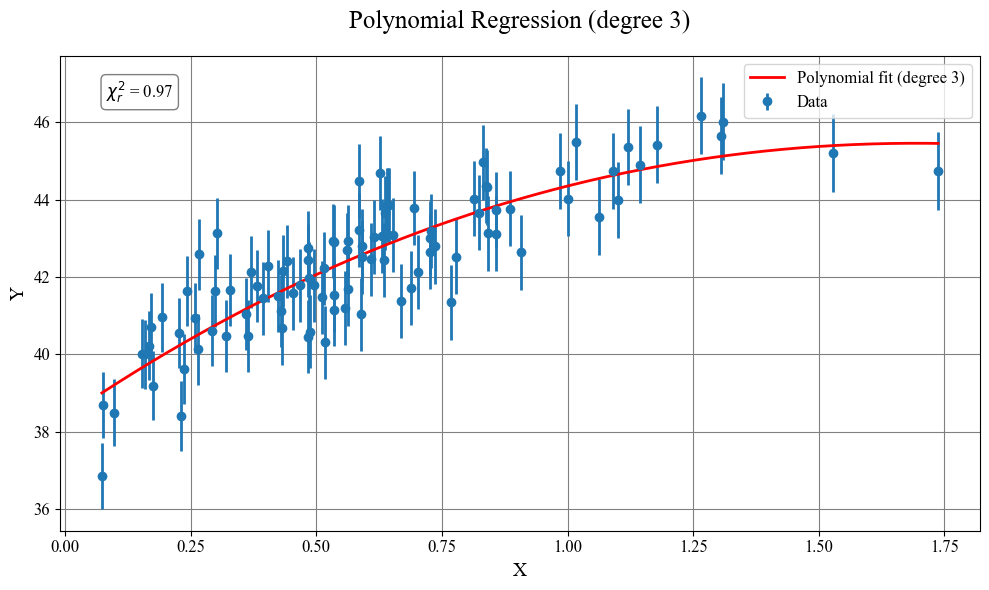

In [15]:
fitter.plot_fit()